In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, log_loss, make_scorer,roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, KFold, RandomizedSearchCV


In [2]:
from src.clean_data import get_model_data
from ROC import plot_roc_curve
%load_ext autoreload
%autoreload 2

In [3]:
def cross_val(classifier, X, y):
    kf = KFold(n_splits=5, shuffle=True)
    accuracy = []
    rmse=[]
    model = classifier 
    
    for train, test in kf.split(X):
        X_train, X_test = X[train], X[test]
        y_train, y_test = y[train], y[test]
        
        model.fit(X_train, y_train)

        pred = model.predict(X_test)
        accuracy.append(accuracy_score(y_test, pred))
        rmse.append(np.sqrt(mean_squared_error(y_test, pred)))

    accuracy = np.mean(accuracy)
    rmse = np.mean(rmse)
    return model,accuracy,rmse


In [4]:
def random_forest(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    
    y_predict = model.predict(X_test)
    prob=model.predict_proba(X_test)
    #rmse = np.sqrt(mean_squared_error(y_test, y_predict))
    coeff = model.feature_importances_
    print("accuracy score:", model.score(X_test, y_test))
    print("precision score:", precision_score(y_test, y_predict))
    print("recall:", recall_score(y_test, y_predict))
    return prob

In [8]:
X_train,X_test,y_train,y_test=get_model_data('data/data.json')

In [9]:
prob=random_forest(X_train,X_test,y_train,y_test)

accuracy score: 0.992189679218968
precision score: 0.9387755102040817
recall: 0.8070175438596491


In [10]:
np.mean(prob,axis=0)

array([0.96853835, 0.03146165])

In [11]:
np.max(prob,axis=0)

array([1., 1.])

In [ ]:
np.unique(prob,axis=0)

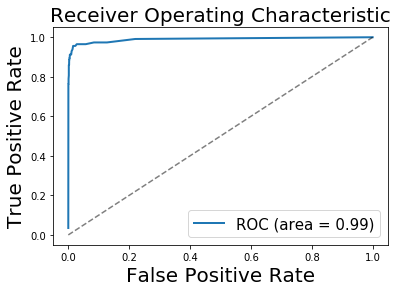

In [13]:
fig,ax = plt.subplots();
plot_roc_curve(prob[:,1],y_test,ax,'ROC');

In [14]:
fpr,tpr,thresh=roc_curve(y_test,prob[:,1])
    

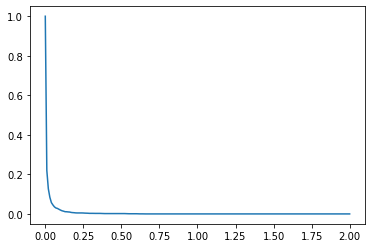

In [17]:
plt.plot(thresh,fpr)